In [1]:
#Реалзиация линейной регрессии для класса virginica при помощи sklearn

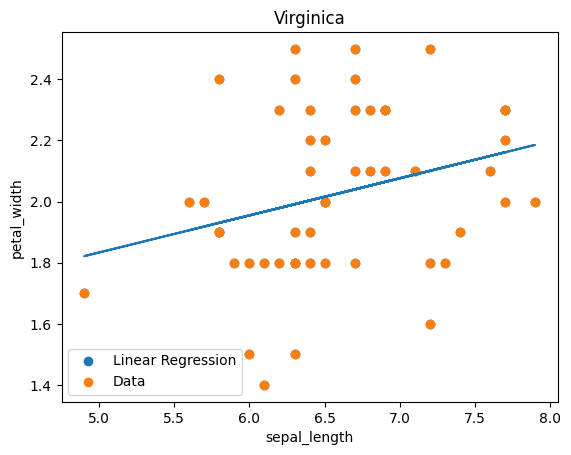

coefficient of determination: 0.07902154414767626
intercept: 1.2261083743842365
slope: [0.12141646]


In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

iris_set = sns.load_dataset("iris")
virginica_data = iris_set[iris_set['species'] == 'virginica']
x_label = 'sepal_length'
y_label = 'petal_width'
x = virginica_data[x_label].values.reshape((-1, 1))
y = virginica_data[y_label].values
model = LinearRegression()
model.fit(x, y)

axes = plt.axes()
plt.title('Virginica')
axes.set_xlabel(x_label)
axes.set_ylabel(y_label)
plt.scatter(virginica_data[x_label], virginica_data[y_label], label='Linear Regression')
plt.scatter(x, y, label ='Data')
plt.plot(x, model.predict(x))
plt.legend(loc="lower left")
plt.show()

print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)


In [2]:
#Собственная реалзиация линейной регрессии для класса virginica

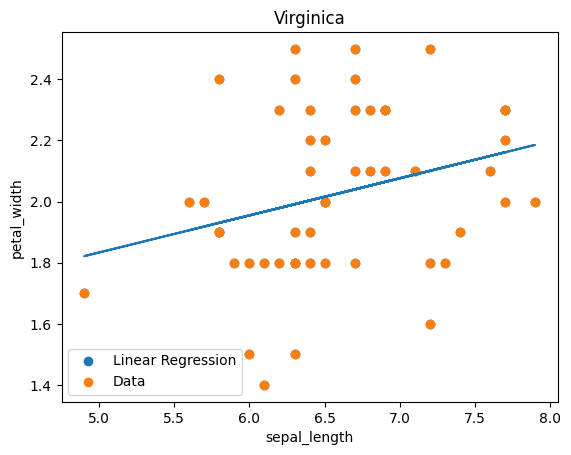

coefficient of determination: 0.07902154414767604
intercept: 1.2261083499825767
slope: [0.12141646]


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class CustomLinearRegression:
    def __init__(self, rate=0.01, iters=200000):
        self.rate = rate
        self.iters = iters
        self.theta = None
        self.intercept = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.intercept = 0

        for _ in range(self.iters):
            y_pred = np.dot(X, self.theta) + self.intercept
            d_theta = X.T@(y_pred - y)/m
            d_intercept = np.sum(y_pred - y)/m
            self.theta -= self.rate * d_theta
            self.intercept -= self.rate * d_intercept

    def predict(self, X):
        y_pred = X@self.theta + self.intercept
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        r2 = 1 - u/v
        return r2

    @property
    def intercept_(self):
        return self.intercept

    @property
    def coef_(self):
        return self.theta


iris_set = sns.load_dataset("iris")
virginica_data = iris_set[iris_set['species'] == 'virginica']
x_label = 'sepal_length'
y_label = 'petal_width'
x = virginica_data[x_label].values.reshape((-1, 1))
y = virginica_data[y_label].values
model = CustomLinearRegression()
model.fit(x, y)

axes = plt.axes()
plt.title('Virginica')
axes.set_xlabel(x_label)
axes.set_ylabel(y_label)
plt.scatter(virginica_data[x_label], virginica_data[y_label], label='Linear Regression')
plt.scatter(x, y, label ='Data')
plt.plot(x, model.predict(x))
plt.legend(loc="lower left")
plt.show()

print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

In [ ]:
#Из полученных данных видно, что собственная и библиотечная реализации дают практически одинаковые результаты.